# TUTORIAL E.D.A. SOBRE IRIS DATASET 

En este notebook realizamos un análisis **exploratorio de los datos (EDA: en inglés Exploratory Data Analysis)**. Este proceso es el que se utiliza para evaluar los datos disponibles y generar un conocimiento general del comportamiento de las variables del problema.


Lo primero que necesitamos instalar son librerías de análisis de datos como **pandas** y **numpy**, y librerías de visualización (elegiremos **matplotlib** y **seaborn**). En este notebook utilizaremos el dataset "iris", en su versión ofrecida por Seaborn, que es un dataset histórico en la ciencia de datos.

![FOTO](./img/iris.jpeg)
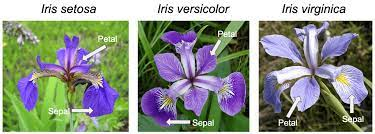

In [1]:
pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introducción al Análisis Exploratorio

Es fundamental cargar, explorar y entender los datos, su calidad y su comportamiento **antes** de empezar a trabajar con ellos. Este proceso es necesario para tener una aproximación a los datos y debemos hacerlo antes de realizar cualquier análisis. Además, debemos conocer el comportamiento de los datos porque **muchas de las técnicas estadísticas de análisis de datos presuponen el cumplimiento de unas condiciones previas**, como **normalidad**, **no colinearidad** y **escalas comparables** para poder garantizar el funcionamiento correcto de las técnicas.

La definición formal de este análisis exploratorio de los datos es: el conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos.

# Análisis Exploratorio de los datos:

# 1) Importando los datos

Seguiremos los pasos que ya hemos visto en anteriores ejemplos de análisis exploratorio. 
- Lo primero que haremos es cargar el dataset que, en esta ocasión, obtenemos directamente del paquete Seaborn.
- A continuación, procedemos a visualizar los primeros datos que nos ofrece este dataset utilizando la función **.head()**.

In [3]:
# Carga del dataset
df = sns.load_dataset("iris")
# Visualización de los primeros "registros"
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2) Limpieza de Datos

Una vez que hemos cargado los datos y hemos verificado su integridad, pasamos a la limpieza. Ahora revisaremos el formato de los datos, los tipos de datos que tenemos, los valores nulos y haremos un comentario sobre los valores duplicados.

### 2.1) Tipos de datos

Ahora nos interesa familiarizarnos con los tipos de datos de nuestro dataset. Esto sucede por dos motivos, el primero es que nos interesa saber si estamos tratando con texto, valores numéricos, categóricos, números enteros, decimales, y sus medidas estadísticas centrales y de dispersión. Básicamente queremos un resumen matemático de alto nivel sobre los principales estadísticos de nuestro dataset.

Si utilizamos el método **.dtypes** sobre el DataFrame veremos que todos los valores de las columnas son numéricos, menos el de la clase que queremos predecir (llamado **species**) que es del tipo string. Pandas llama al tipo string como object, por eso veremos el valor object en la última línea.

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Cuando verificamos el tipo de datos, también suele ser útil verificar el tamaño del Dataset. El dataset es una tabla, por lo que tiene una cantidad de registros igual a la cantidad de filas y una cantidad de variables igual a la cantidad de columnas. El atributo .shape del DataFrame nos permite saber el tamaño del DataFrame. Lo devuelve como una tupla de la forma: ("número de filas", "número de columnas")

In [5]:
print(df.shape)
print(type(df.shape))

(150, 5)
<class 'tuple'>


Si queremos saber los valores 'únicos' que aparecen en una de las columnas (en este caso la que contiene el nombre de la especie), de manera que podamos conocer cuantos tipos de especies se contempla en el dataset, ejecutaremos la función de numpy **.unique()** de la siguiente forma:

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Realizamos el split de los datos

Ahora que sabemos la cantidad de datos que tenemos, haremos un split entre datos de entrenamiento y de test.

¿Por qué hacerlo a esta altura y no al finalizar el EDA? 
Para asegurarnos de no contaminar nuestro criterio. Al hacer este proceso con los datos con los que se va a entrenar el modelo, se pretende ir descubriendo relaciones en el dataset con la misma información disponible que tendrá el modelo.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['species'])

### 2.2) Valores nulos

Ahora queremos ver si el dataset tiene valores nulos y qué hacer con ellos en caso de que los tenga. Vemos que este dataset no tiene valores nulos con los métodos que se enseñan debajo, pero en caso de que te interese ver cómo podemos atacar valores nulos, al final del notebook hay algunas ideas de cómo se suelen tratar en la práctica, y algunas ideas para imputarlos, en caso de que quieras hacerlo.

In [9]:
# Una forma de comprobar valores nulos: la función .info() 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 111 to 141
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [10]:
# Otra manera de comprobar nulos: usando el método isna() y recorriendo las columnas del dataset
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "sepal_length" has 0 nulls
Column "sepal_width" has 0 nulls
Column "petal_length" has 0 nulls
Column "petal_width" has 0 nulls
Column "species" has 0 nulls


### 2.3) Valores duplicados

En este caso, los valores duplicados no nos interesan por **dos razones**.  
- La primera es porque sabemos que el dataset no contiene valores duplicados que no deban tenerse en cuenta para el análisis. Esto en la práctica no lo sabríamos, pero como es un dataset clásico esta información es conocida. 
- La segunda es que si miramos el tamaño de nuestro dataset, tenemos solamente 150 registros, por lo que si eliminamos duplicados corremos el riesgo de no poder realizar un análisis suficiente con los datos que nos queden.

Aún así, para comprobar cómo podríamos realizar esta parte del EDA, se mostrará debajo a pesar de que no se realizarán cambios reales sobre el DataFrame.

Primero buscaremos los valores repetidos en el dataframe.  
Esto podemos hacerlo con el método **.duplicated()**. Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si se filtrase por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como interesa ver todos los elementos, se le pasa el argumento "keep" como False, lo que significa que se desea ver todos los valores repetidos.

In [11]:
df_train.duplicated(keep=False)

111    False
10     False
42     False
104    False
91     False
       ...  
51     False
146    False
81     False
89     False
141    False
Length: 120, dtype: bool

"Filtramos" el dataset para mostrar solo los registros duplicados, usando como parámetro la función **.duplicated()**:

In [12]:
df_train[df_train.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species


Si se desea eliminar estos registros duplicados, se puede utilizar el método drop_duplicates, que elimina todas las apariciones de duplicados en el dataset, menos la primera.

In [13]:
df_train.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,virginica
10,5.4,3.7,1.5,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica
91,6.1,3.0,4.6,1.4,versicolor
...,...,...,...,...,...
51,6.4,3.2,4.5,1.5,versicolor
146,6.3,2.5,5.0,1.9,virginica
81,5.5,2.4,3.7,1.0,versicolor
89,5.5,2.5,4.0,1.3,versicolor


Se puede comprobar que el DataFrame resultante tiene 119 filas en lugar de 120 (hemos eliminado 1 registro duplicados. OJO: Esto es probable que varíe cada vez que se ejecute el split).  
A tener en cuenta que, en este punto en realidad, no hemos tocado el DataFrame. La operación de .drop_duplicates no es una operación inplace. Es decir que si no sobreescribimos el dataframe df con df.drop_duplicates o lo guardamos en otro dataframe, no cambiará nada. Si no queremos tener que redefinir otro dataframe o sobreescribirlo, la función también tiene un argumento inplace que si cambiamos a True modificará el DataFrame df (en este caso no nos devolverá nada en pantalla).

```python
# Método 1: Sobreescribir el valor de df
df = df.drop_duplicates()

# Método 2: Guardar el valor en otra variable
df_dedup = df.drop_duplicates()

# Método 3: Sobreescribir inplace
df.drop_duplicates(inplace=True)
```

# 3) Visualización

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante. Para ello usaremos el paquete gráfico Seaborn.

## 3.1) Análisis univariante

El análisis univariante se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. 
¿Cómo es su distribución? ¿Es una categoría o una variable continua? ¿Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.

#### sepal_length

La primera variable es sepal_length. Si se observa la imagen de debajo, se puede ver lo que representa el "sepal length" en cada una de estas flores. Para este análisis, será una de las variables que se usará para intentar predecir el tipo de flor, pues no se conoce nada sobre este tipo de planta.

![iris2.png](./img/iris2.png)
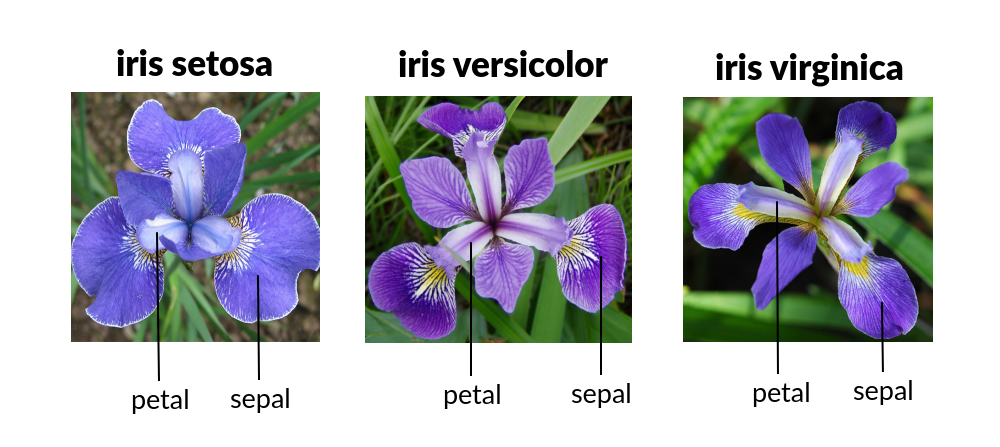

<Axes: xlabel='sepal_length', ylabel='Count'>

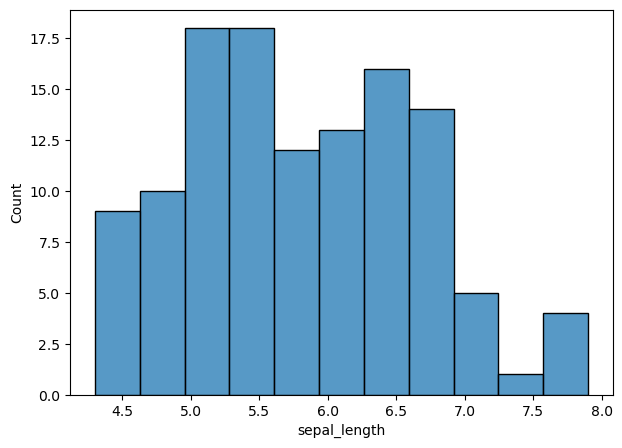

In [14]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_length', bins=11)

Vemos que la distribución de esta variable no es exactamente una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal), pero tiene una cierta forma de campana. La mayoría de los valores se encuentran entre 5 y 6.5

#### sepal_width

Veamos ahora como se comporta la variable sepal_width. Veremos en el gráfico debajo que esta variable tiene un comportamiento mucho más similar a una distribución normal.

<Axes: xlabel='sepal_width', ylabel='Count'>

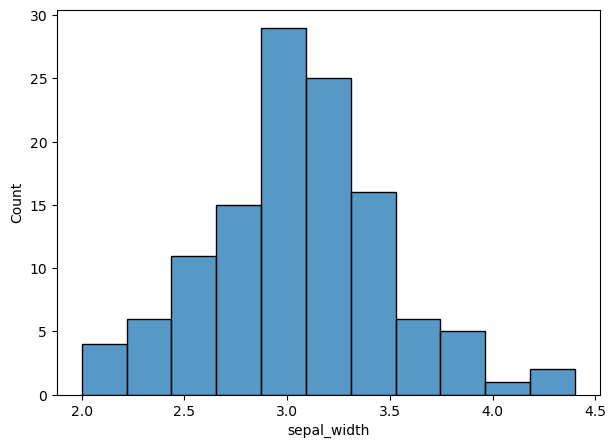

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='sepal_width', bins=11)

#### petal_length

Veamos ahora cómo se comporta la variable petal_length. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. 
Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica.

<Axes: xlabel='petal_length', ylabel='Count'>

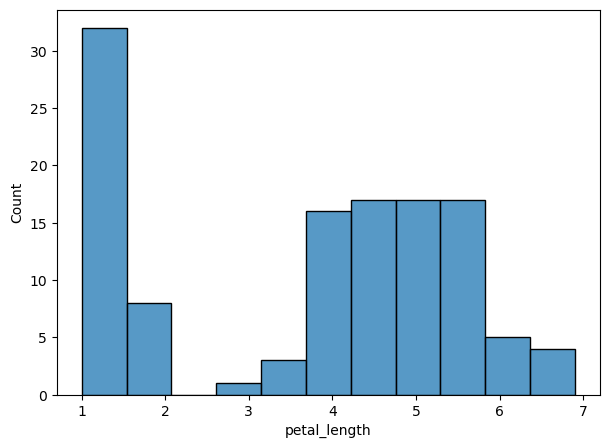

In [16]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_length', bins=11)

#### petal_width

Analizamos a continuación el comportamiento de la variable petal_width. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y, al igual que la variable anterior, también tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. 
De igual forma, se verá al final cómo podemos solucionarlo aplicando una transformación logarítmica, aunque probablemente no funcione tan bien como en petal_length

<Axes: xlabel='petal_width', ylabel='Count'>

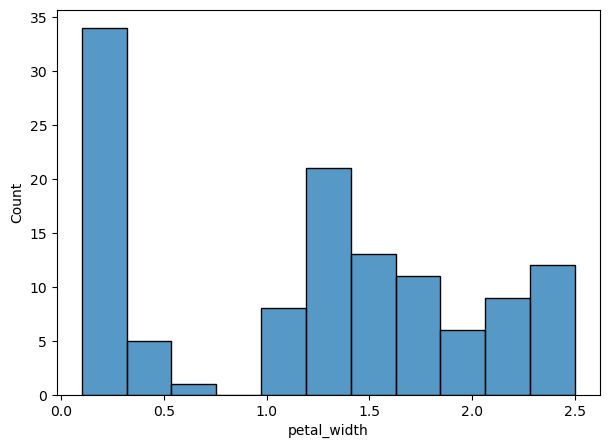

In [17]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='petal_width', bins=11)

#### species

Llegamos al apartado más importante de este proceso: el análisis de la clase que queremos intentar predecir. El objetivo de este problema es predecir el tipo de flor en función de las 4 variables que acabamos de estudiar, así que un buen punto de partida será ver cómo se distribuye la variable.

Lo primero que debemos pensar es ¿qué tipo de variable es esta? 
Se trata de una variable **categórica**, por lo que no podemos hacer un histograma como en los casos anteriores. La forma más sencilla de mostrar la distribución de una variable categórica es por **conteo**, por lo que utilizaremos un countplot de Seaborn.

<Axes: xlabel='species', ylabel='count'>

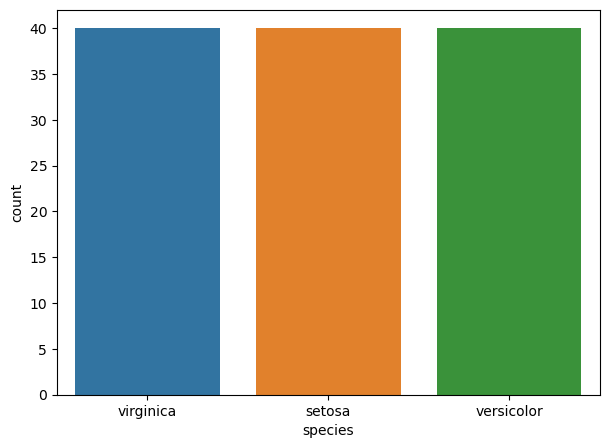

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_train, x='species')

A primera vista, da la impresión de que todas las clases tienen la misma representación, que es el caso ideal. En el caso de clases desbalanceadas, tenemos que ver cómo podemos rebalancear las clases para que nuestro modelo pueda aprender lo suficiente de cada clase y no priorizar una sobre otra, o incluso predecir siempre una si el desbalance es muy grande.

Dado que el gráfico puede ser engañoso, se realiza a continuación una pequeña verificación solo para asegurarnos de la distribución.

In [19]:
df_train['species'].value_counts()

species
virginica     40
setosa        40
versicolor    40
Name: count, dtype: int64

## Análisis Bivariante

Una vez se ha comprobado como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás. Como las 4 variables independientes son numéricas, podemos utilizar un "pequeño truco" para graficar rápidamente las relaciones entre todas ellas utilizando un **pairplot** de Seaborn. En la práctica, si hay muchas variables, es posible que antes tengamos que hacer, por ejemplo, un estudio de correlación que nos permita quitar algunas variables irrelevantes, para analizar únicamente las variables relevantes y/o correladas.

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


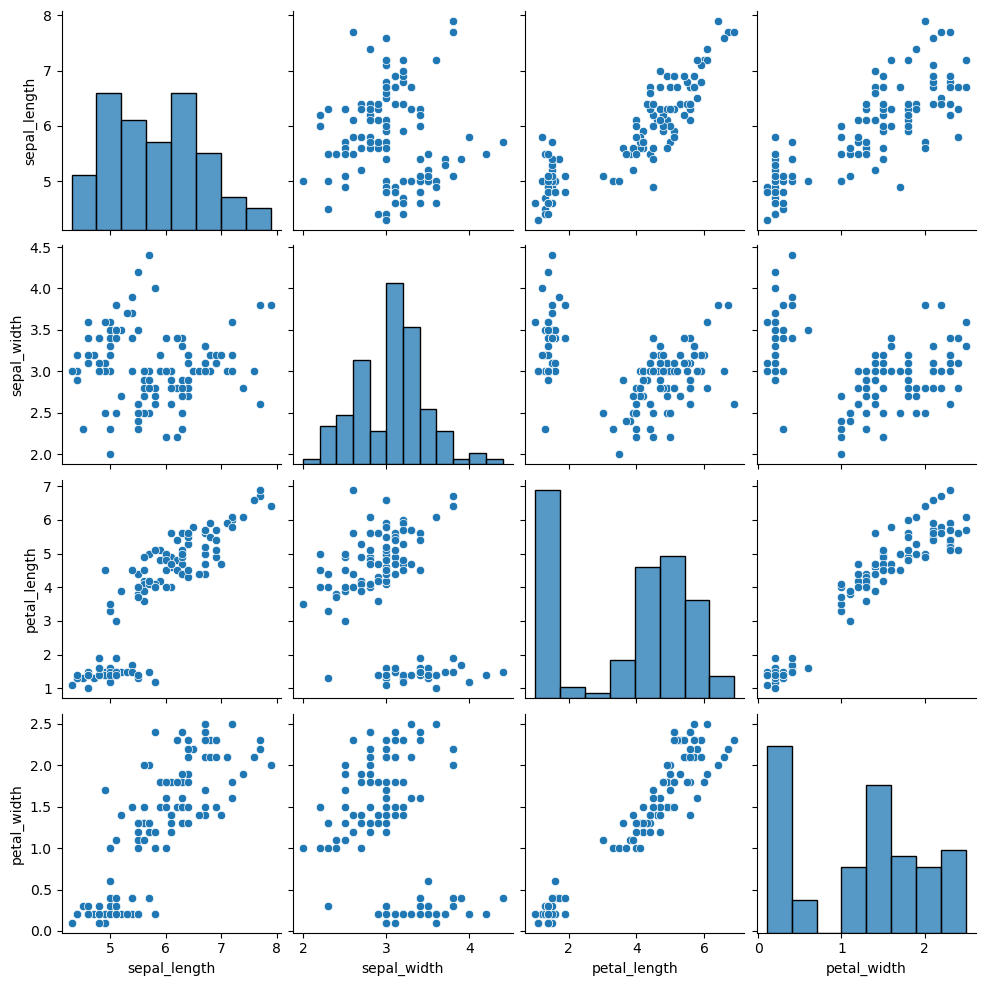

In [20]:
sns.pairplot(df_train)

Vemos que las variables petal_length y petal_width están bastante correlacionadas (el aumento/disminución de una provoca un cambio claro en la otra. En un gráfico esto se traduce en la "alineación" de valores (puntos) sobre una "recta"), y lo mismo se ve para petal_length y sepal_length.

## Análisis Multivariable

Finalmente, podemos introducir una variable más a este proceso, que será la variable a predecir "species". Podemos hacerlo introduciendo un hue en el pairplot para ver si podemos visualizar rápidamente alguna frontera de separación entre las 3 especies de flores.

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


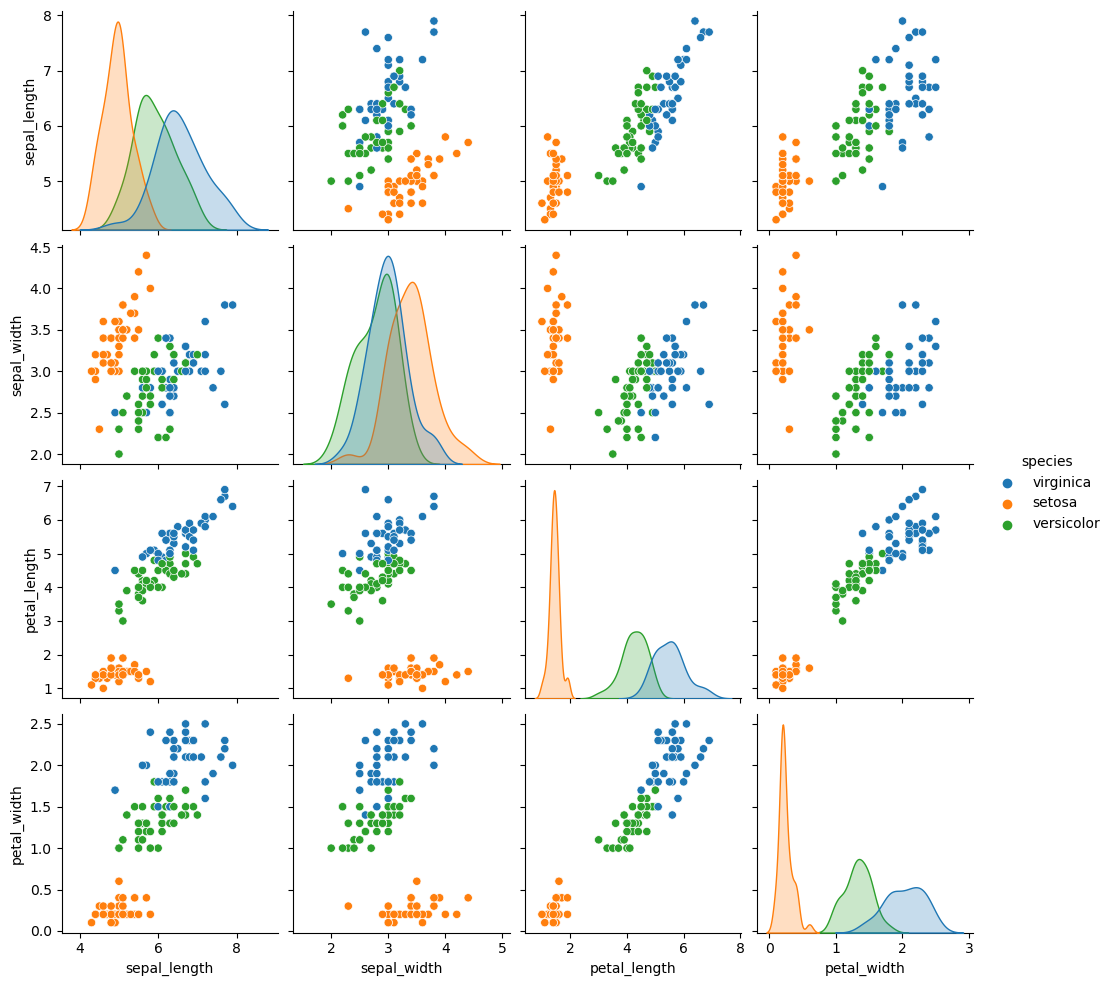

In [21]:
sns.pairplot(df_train, hue='species')

El gráfico que se muestra encima es muy informativo. Vemos que claramente existe una frontera de separación entre los datos, por lo que es probable que nuestro problema se pueda resolver de forma analítica consiguiendo un buen resultado.

## Análisis de correlación

Este análisis siempre es muy importante en las variables numéricas, y sobre todo en los modelos lineales (aunque debemos revisarlo siempre). La multicolinearidad es un gran problema en el cálculo matricial, por lo que debemos evitar a toda costa variables con correlación alta, ya que ello significa que se están introduciendo datos al modelo que luego entrenaremos para resolver el problema que pueden provocar la ineficiencia del mismo.

**NOTA:**
Un modelo de regresión lineal posee un problema de multicolinealidad, cuando existe correlación entre tres o más variables independientes, reduciendo así el poder predictivo de las variables independientes con respecto al modelo. Si la correlación se da entre dos variables independientes, se habla de colinealidad. Por ejemplo: Si se dispone de un modelo de regresión lineal en el que la variable dependiente es el salario actual y las variables independientes sean la edad y los años de experiencia, pero probablemente la edad y los años de experiencia estén asociados; entonces la edad va a proporcionar información para predecir, pero los años de experiencia probablemente también den información que ya pudo haber dado la variable edad. En consecuencia, se está provocando un problema, en este caso de colinealidad, donde el modelo no será adecuado, pues las variables independientes están ofreciendo información redundante.
¿Cómo solucionar el problema de multicolinealidad? Se puede, entre otras medidas, mejorar el diseño muestral extrayendo la información máxima de las variables observadas, eliminando las variables que se sospechen son causantes de multicolinealidad, o en caso de disponer de pocas observaciones, aumentar el tamaño de la muestra.

Algunos errores comunes que se cometen en el análisis de correlación:

- Incluir variables categóricas: La correlación (de Pearson) se calcula como el ratio entre la covarianza entre dos variables y la raíz del producto de sus varianzas. Esto significa que las **variables que utilicemos en el análisis de correlación deberán ser continuas**.
- No definir la escala correcta: La correlación está entre 0 y 1, pero muchas veces cuando graficamos veremos que la escala de colores se ajusta al valor mínimo y máximo de nuestra escala. Es muy poco probable tener dos variables que tengan correlación 0 y 1, y, por lo tanto, la escala variará entre estos dos valores y no entre 0 y 1, esto nos puede llevar a pensar que una diferencia entre dos valores es mayor de lo que es en realidad. Para solucionar esto se suelen imponer los valores máximos y mínimos del mapa de calor.
- Tomar correlación "buena" o "mala" basada en un número arbitrario: Muchas veces veremos declaraciones como "correlación por encima de 0.7 es muy alta" o lo contrario. En la realidad debemos apoyarnos en el gráfico y el valor de la correlación a la vez para poder tomar una decisión más acertada.
- No graficar los valores de la correlación sobre los gráficos en el heatmap: Los valores ayudan a resolver esas diferencias en las que no estamos seguros de si lo que vemos es una correlación muy alta o regular. Para esto le pasaremos al heatmap el parámetro annot=True

<Axes: >

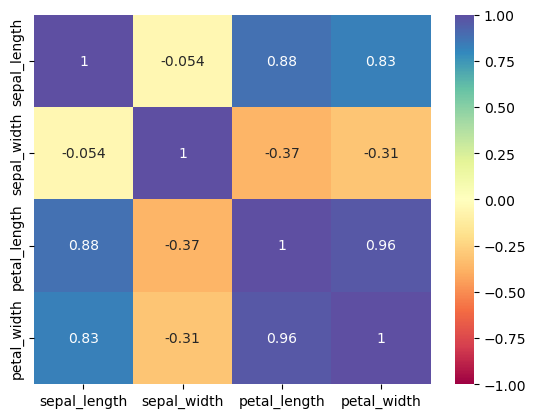

In [22]:
sns.heatmap(df_train.corr(numeric_only=True), vmin=-1, vmax=1, cmap='Spectral', annot=True)

Se ve claramente que la correlación entre petal_length y sepal_length y la de petal_length y petal_width es alta, como habíamos visto en los demás análisis. Esto confirma nuestra teoría. Veamos que pasa con la escala si no aclaramos los valores de vmax y vmin...

<Axes: >

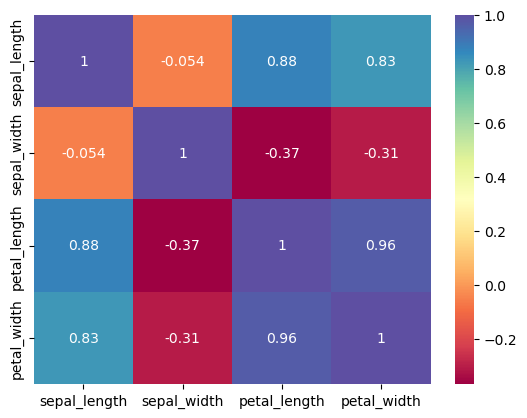

In [23]:
sns.heatmap(df_train.corr(numeric_only=True), cmap='Spectral', annot=True)

Vemos que los colores son más intensos (deberían) porque la escala es más acotada, por lo que el cambio pequeño afecta bastante a la percepción de la diferencia entre los valores de correlación.

## Presentando un modelo

Aún no hemos resuelto el problema de valores numéricos. La clase que queremos predecir tiene valores en texto, y aunque algunos modelos de ML lo permiten, generalmente lo ideal es convertir todas las variables a valores numéricos para aprovechar la computación vectorizada de NumPy. Así que debajo convertimos rápidamente los valores de las 3 clases a números.

In [24]:
df_train['species'].unique()

array(['virginica', 'setosa', 'versicolor'], dtype=object)

In [25]:
map_target_class = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

df_train['species_numerical'] = df_train['species'].map(map_target_class)
df_test['species_numerical'] = df_test['species'].map(map_target_class)

df_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_numerical
111,6.4,2.7,5.3,1.9,virginica,2
10,5.4,3.7,1.5,0.2,setosa,0


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [27]:
X_train = df_train.drop(['species', 'species_numerical'], axis=1)
y_train = df_train['species_numerical']
X_test  = df_test.drop(['species', 'species_numerical'], axis=1)
y_test  = df_test['species_numerical']

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [29]:
lr = LogisticRegression(random_state=101, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [30]:
preds_train = lr.predict(X_train)
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Vemos que la precisión del resultado es **muy elevada**. Esto es razonable porque ya habíamos visto que es posible obtener una frontera de separación bastante buena simplemente con mirar el problema, por lo que era bastante probable que nuestro algoritmo (a pesar de que aún no sabemos cómo funciona) fuera capaz de devolver un resultado muy bueno.  

La pregunta que debemos hacernos es... **¿Hemos terminado?**

Podríamos ver ese resultado y pensar que si, hemos conseguido una precisión muy alta en nuestro modelo, ya está listo para poner en marcha! La verdad es que no, porque sólo hemos validado con el conjunto con el que hemos entrenado el modelo. (Habría que analizar los riesgos del overfitting) Se debe entender que no se ha medido todavía cómo es el desempeño de nuestro modelo con nuevos datos.

[Entendiendo las métricas analizadas](https://datasmarts.net/es/mas-alla-del-accuracy-precision-recall-y-f1/)